In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [3]:
dates = [datetime(2020,1,23),datetime(2020,1,24)]
dt_index = pd.DatetimeIndex(dates)
data = np.random.randn(2,2)
df = pd.DataFrame(data,index = dt_index, columns = ['A','B'])

In [6]:
df.index.max()

Timestamp('2020-01-24 00:00:00')

In [9]:
corona = pd.read_csv('../data/covid_19_data.csv')
corona['ObservationDate'] = corona['ObservationDate'].apply(pd.to_datetime)

In [10]:
corona.set_index('ObservationDate',inplace=True)

In [11]:
corona.groupby([corona.index.year,corona.index.month])['Confirmed'].agg(sum)

ObservationDate  ObservationDate
2020             1                      38535.0
                 2                    1671959.0
                 3                    8894726.0
                 4                   63402405.0
                 5                  144769885.0
                 6                  246578791.0
                 7                  431490739.0
                 8                  671137307.0
                 9                  355744376.0
Name: Confirmed, dtype: float64

### resample rule

#### time series offset strings(aliases)

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html



In [13]:
corona.resample(rule='M').mean()

,SNo,Confirmed,Deaths,Recovered
ObservationDate,,,,
2020-01-31,247.0,78.164300,1.803245,1.711968
2020-02-29,1656.0,719.122151,20.171183,163.782366
2020-03-31,6744.0,1132.941791,49.187747,344.880780
2020-04-30,15460.5,6616.823732,435.827385,1713.087664
2020-05-31,26399.5,11773.738208,778.166233,4409.083767
2020-06-30,43237.5,11533.152058,621.405285,5550.425210
2020-07-31,65326.0,18927.522876,806.713647,10624.437338
2020-08-31,88230.5,29164.666565,1037.805536,18401.601947
2020-09-30,104559.5,36879.989218,1201.234294,24722.372382


In [19]:
corona['Deaths']['2020-01-31':'2020-05-16'].resample('W-MON').max()

ObservationDate
2020-02-03      414.0
2020-02-10      974.0
2020-02-17     1789.0
2020-02-24     2495.0
2020-03-02     2803.0
2020-03-09     3008.0
2020-03-16     3099.0
2020-03-23     6077.0
2020-03-30    11591.0
2020-04-06    16523.0
2020-04-13    20465.0
2020-04-20    24114.0
2020-04-27    26977.0
2020-05-04    29079.0
2020-05-11    32065.0
2020-05-18    34466.0
Freq: W-MON, Name: Deaths, dtype: float64

In [18]:
pd.date_range(start=datetime(2020,1,18),end=datetime(2020,1,24),freq='B')

DatetimeIndex(['2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23',
               '2020-01-24'],
              dtype='datetime64[ns]', freq='B')

## Shift

In [22]:
corona.tshift(freq='M',periods=2).head()
# 두 달씩 미루기

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  """Entry point for launching an IPython kernel.


,SNo,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
ObservationDate,,,,,,,
2020-02-29,1,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-02-29,2,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2020-02-29,3,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
2020-02-29,4,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-02-29,5,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


## Rolling & Expanding

In [29]:
corona = pd.read_csv('../data/covid_19_data.csv',index_col='ObservationDate', parse_dates=True)
corona.index
# datetime 바로 바꾼당

DatetimeIndex(['2020-01-22', '2020-01-22', '2020-01-22', '2020-01-22',
               '2020-01-22', '2020-01-22', '2020-01-22', '2020-01-22',
               '2020-01-22', '2020-01-22',
               ...
               '2020-09-13', '2020-09-13', '2020-09-13', '2020-09-13',
               '2020-09-13', '2020-09-13', '2020-09-13', '2020-09-13',
               '2020-09-13', '2020-09-13'],
              dtype='datetime64[ns]', name='ObservationDate', length=109382, freq=None)

In [28]:
def dateparse(str_dt):
    return pd.datetime.strptime(str_dt,'%m-%d-%Y')

# corona = pd.read_csv('../data/covid_19_data.csv',index_col='ObservationDate',
#                      parse_dates=['ObservationDate'],date_parser=dateparse)
# 이 코드는 에러 나지만 이렇게 사용할 수 있음...

In [30]:
# sample 별 7개씩 aggregation됨
corona.rolling(7).mean()

,SNo,Confirmed,Deaths,Recovered
ObservationDate,,,,
2020-01-22,NaN,NaN,NaN,NaN
2020-01-22,NaN,NaN,NaN,NaN
2020-01-22,NaN,NaN,NaN,NaN
2020-01-22,NaN,NaN,NaN,NaN
2020-01-22,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-09-13,109375.0,5621.714286,345.857143,4067.571429
2020-09-13,109376.0,3403.142857,150.285714,2075.428571
2020-09-13,109377.0,3583.857143,150.428571,2254.428571


<AxesSubplot:xlabel='ObservationDate'>

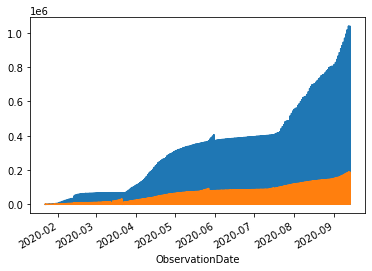

In [34]:
corona['Confirmed'].plot()
corona['Confirmed'].rolling(7).mean().plot()


In [36]:
corona.expanding(1).mean()
# sample 개수가 늘어남 잘 쓰이진 않음

,SNo,Confirmed,Deaths,Recovered
ObservationDate,,,,
2020-01-22,1.0,1.000000,0.000000,0.000000
2020-01-22,1.5,7.500000,0.000000,0.000000
2020-01-22,2.0,7.000000,0.000000,0.000000
2020-01-22,2.5,5.500000,0.000000,0.000000
2020-01-22,3.0,4.400000,0.000000,0.000000
...,...,...,...,...
2020-09-13,54689.5,17587.619869,743.497449,10025.029110
2020-09-13,54690.0,17587.469450,743.491310,10024.937456
2020-09-13,54690.5,17587.320360,743.484522,10024.857396


In [37]:
import pytz

In [38]:
KST = pytz.timezone('Asia/Seoul')

In [39]:
KST.localize(datetime(2020,1,1))

datetime.datetime(2020, 1, 1, 0, 0, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

In [40]:
date = KST.localize(datetime(2020,1,1))
date.astimezone(pytz.utc)

datetime.datetime(2019, 12, 31, 15, 0, tzinfo=<UTC>)

In [41]:
date == date.astimezone(pytz.utc)

# timezone은 다른데 같은 시간이라 할 수 있음

True

In [45]:
from datetime import timedelta

In [46]:
def last_friday():
    today = KST.localize(datetime.today())
    offset = 4-today.weekday() % 4
    aweekago = today - timedelta(weeks=1)
    last_friday = aweekago + timedelta(days=offset)
    return last_friday
last_friday()

datetime.datetime(2020, 9, 22, 1, 24, 41, 150956, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

In [64]:
uss = corona[corona['Country/Region']=='US']
uss = uss.groupby('ObservationDate').sum()
uss_one = uss - uss.shift(1).fillna(0)

<AxesSubplot:xlabel='ObservationDate'>

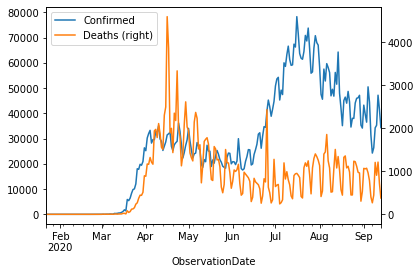

In [65]:
uss_one[['Confirmed','Deaths']].plot(secondary_y=['Deaths'])

x축 날짜 해결 방법
    - plt.tight_layout()
    - fig.autofmt_xdate()
    
</br>

## ETS

**y_t = Level + Trend + Seasonality + Noise**

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = pd.Series([i + np.random.randint(10) for i in range(1,100)])
result = seasonal_decompose(series, freq=1)

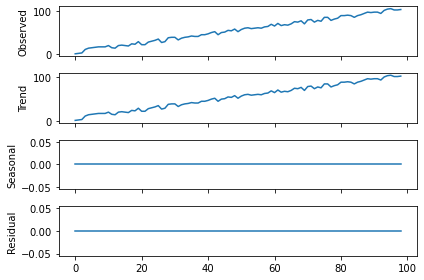

In [72]:
result.plot();

In [74]:
series = pd.Series([i**2 + np.random.randint(10) for i in range(1,100)])
result = seasonal_decompose(series, model='multiplicative', freq=1)

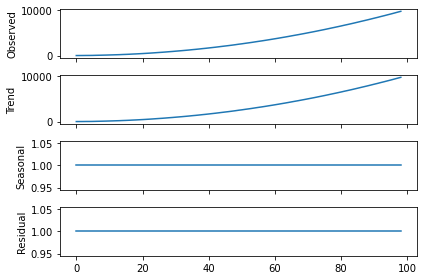

In [75]:
result.plot();

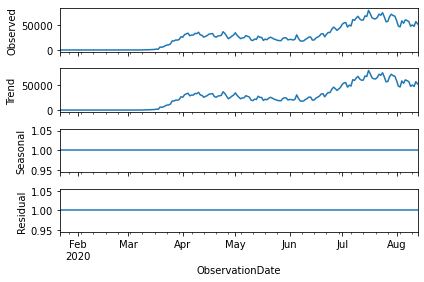

In [228]:
result = seasonal_decompose(timeseries+1,model='multiplicative', freq=1)
result.plot();

## Weighted Moving Average

<AxesSubplot:xlabel='ObservationDate'>

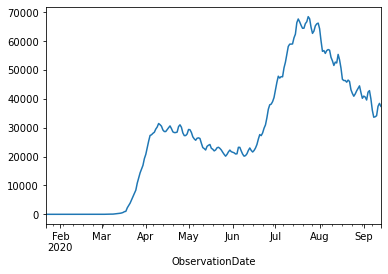

In [77]:
k = uss_one['Confirmed'].ewm(span=7).mean()
k.plot()

## Exponential Smoothing

- Simple Exponential Smoothing : trend, seasonality 반영 x
- Holt's : trend만 반영
- Holt-Winter's : seasonality까지 반영

In [78]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [82]:
train = uss_one[:'2020-08-13']
test = uss_one['2020-08-14':]

<AxesSubplot:xlabel='ObservationDate'>

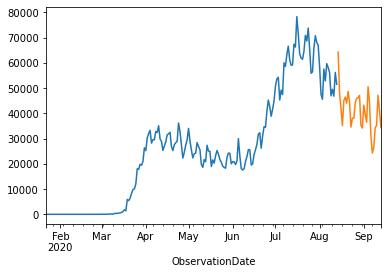

In [83]:
train['Confirmed'].plot()
test['Confirmed'].plot()

In [86]:
model = SimpleExpSmoothing(np.asarray(train['Confirmed']))
model_result = model.fit()

In [88]:
y_hat = test.copy()

In [89]:
y_hat['SES'] = model_result.forecast(len(test))

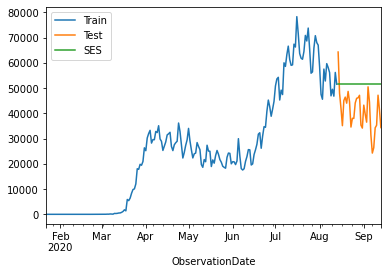

In [91]:
train['Confirmed'].plot(label='Train')
test['Confirmed'].plot(label='Test')
y_hat['SES'].plot(label='SES')
plt.legend()

In [92]:
from sklearn.metrics import mean_squared_error

In [93]:
mean_squared_error(y_hat['Confirmed'],y_hat['SES'])

173551015.13313603

In [96]:
from statsmodels.tsa.api import Holt
model = Holt(np.asarray(train['Confirmed']))
model_result = model.fit()
y_hat = test.copy()
y_hat['Holt'] = model_result.forecast(len(test))

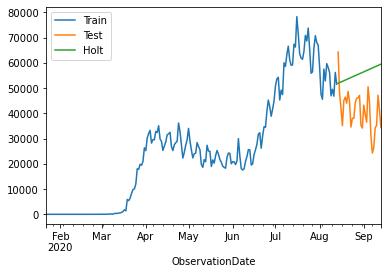

In [97]:
train['Confirmed'].plot(label='Train')
test['Confirmed'].plot(label='Test')
y_hat['Holt'].plot(label='Holt')
plt.legend()

In [98]:
mean_squared_error(y_hat['Confirmed'],y_hat['Holt'])

298694757.46942323

In [224]:
from statsmodels.tsa.api import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Confirmed']),
                seasonal_periods=7,trend='add',seasonal='add')
model_result = model.fit()
y_hat = test.copy()
y_hat['HW'] = model_result.forecast(len(test))

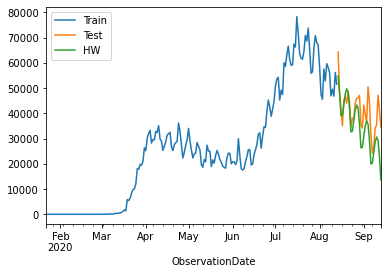

In [202]:
train['Confirmed'].plot(label='Train')
test['Confirmed'].plot(label='Test')
y_hat['HW'].plot(label='HW')
plt.legend()

In [103]:
mean_squared_error(y_hat['Confirmed'],y_hat['HW'])

78207310.3296599

In [215]:
from statsmodels.tsa.api import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Confirmed']+1),
                seasonal_periods=7,trend='mul',seasonal='add')
model_result = model.fit()
y_hat = test.copy()
y_hat['HW'] = model_result.forecast(len(test))

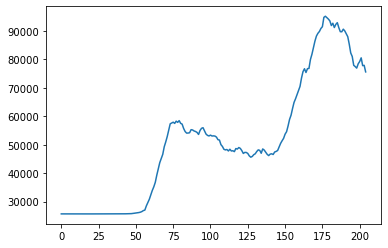

In [223]:
plt.plot(model_result.)

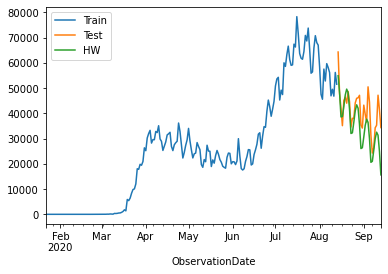

In [210]:
train['Confirmed'].plot(label='Train')
test['Confirmed'].plot(label='Test')
y_hat['HW'].plot(label='HW')
plt.legend()

In [211]:
mean_squared_error(y_hat['Confirmed'],y_hat['HW'])

68796761.4801017

## ARIMA

- ARIMA(p,d,q)(P,D,Q) m
    - seasonality가 있으면 뒤에 파라미터 4개 더 생김

In [104]:
import statsmodels.api as sm

In [106]:
arima = sm.tsa.statespace.SARIMAX(
        train['Confirmed'], order=(2,1,1), seasonal_order= [0,1,0,7],
        enforce_stationarity=False,enforce_invertibility=False)

In [107]:
arima_result = arima.fit()

In [108]:
y_hat['A'] = arima_result.predict(start='2020-08-14',end='2020-09-13'
                    , dynamic = True)
# dynamic : 예측한 데이터를 예측하는데에 씀

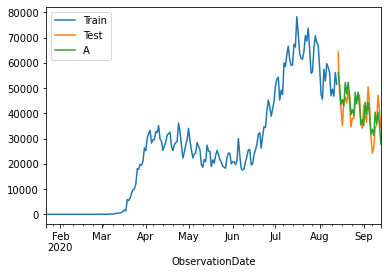

In [109]:
train['Confirmed'].plot(label='Train')
test['Confirmed'].plot(label='Test')
y_hat['A'].plot(label='A')
plt.legend()

In [110]:
mean_squared_error(y_hat['Confirmed'],y_hat['A'])

25113156.08165531

## Stationary
- 평균, 분산, 공분산이 시간에 따라 변하지 않아야 함

### Differencing 
- 앞 데이터와 뒤 데이터의 차이
- stationary하게 만드는 과정  -> **d parameter**
- trend, seasonality가 없어지는 과정 -> 보통 1,2차에서 끝나고 그래도 성능이 좋아지지 않으면 다른 요인의 문제

### Autoregression(AR)
- **p parameter**
- 데이터와 이전 시점 사이의 관계에 대한 회귀 모델

### Moving Average(MA)
- **q parameter**
- 이전 시점의 moveing average의 residual에 대한 회귀 모델 -> noise 예측

## acf, pacf
- acf : 특정 시간만큼 지연된 데이터와 연관성
- pacf : t와 t-p의 연관성을 배제하고 보여줌 
- 값이 파란 영역 내에 다 들어가야 p,q를 정할 수 있음
- confidence level
    - 보통 95%해서 lag=20으로 두고 2개 이상 올라오지 않으면 correlation이 없다고 생각한다.

<AxesSubplot:xlabel='ObservationDate'>

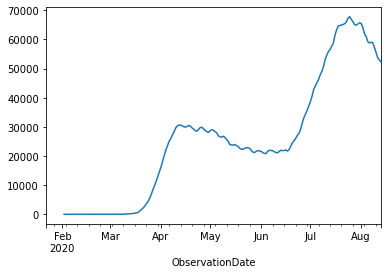

In [113]:
timeseries = train['Confirmed']
timeseries.rolling(12).mean().plot()
# 트렌트, 평균 변화 확인

<AxesSubplot:xlabel='ObservationDate'>

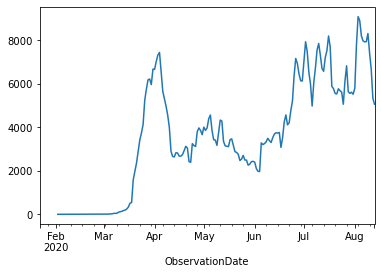

In [114]:
timeseries.rolling(12).std().plot()
# variance 확인

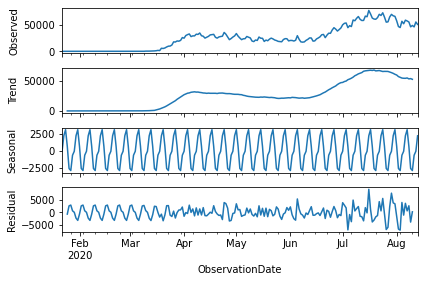

In [116]:
result = seasonal_decompose(timeseries)
result.plot();

In [118]:
# stationary 확인
from statsmodels.tsa.stattools import adfuller

def adf_check(ts):
    result = adfuller(ts)
    if result[1] <= 0.05:
        print('Stationary {}'.format(result[1]))
    else:
        print('Non-Stationary {}'.format(result[1]))


In [119]:
adf_check(timeseries)

Non-Stationary 0.2664050503835642


In [123]:
diff1 = timeseries - timeseries.shift(1)
adf_check(diff1.dropna())

Non-Stationary 0.35049497553913184


Stationary 1.6020066211124244e-06


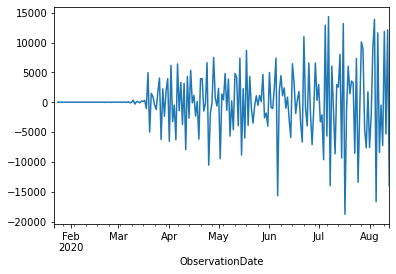

In [126]:
diff2 = diff1 - diff1.shift(1)
adf_check(diff2.dropna())
diff2.plot();

Non-Stationary 0.052313464687239165


<AxesSubplot:xlabel='ObservationDate'>

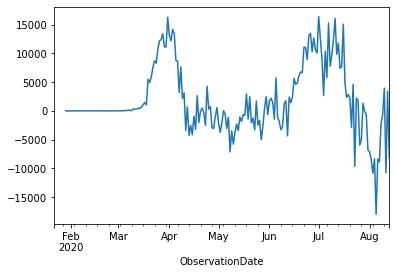

In [128]:
seasonal_diff1 = timeseries - timeseries.shift(7)
adf_check(seasonal_diff1.dropna())
seasonal_diff1.plot()

In [145]:
diff2_seasonal_diff1 = diff2 - diff2.shift(7)
adf_check(diff2_seasonal_diff1.dropna())

Stationary 4.042667176872469e-09


In [131]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

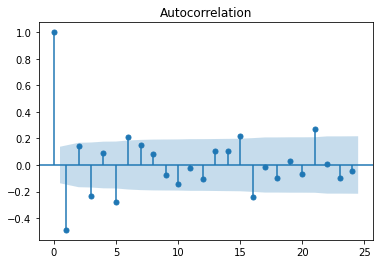

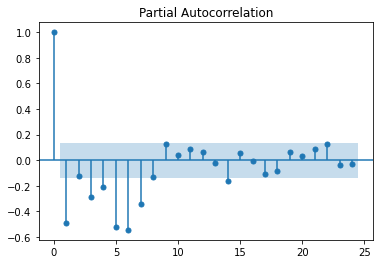

In [146]:
plot_acf(diff2.dropna());
plot_pacf(diff2.dropna(),method='ywm');

acf -> q=1

pacf -> p=7 안으로 들어감

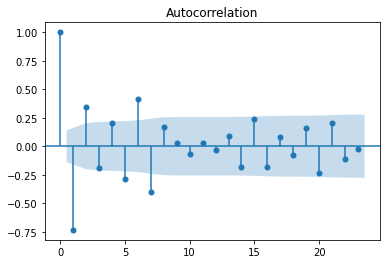

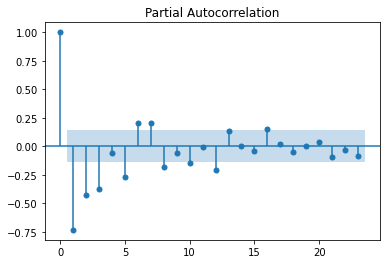

In [147]:
plot_acf(diff2_seasonal_diff1.dropna());
plot_pacf(diff2_seasonal_diff1.dropna(),method='ywm');

acf -> Q=2

pacf -> P=3

In [160]:
model = sm.tsa.statespace.SARIMAX(timeseries,
        order=[7,2,1],seasonal_order=[3,2,2,7])

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [161]:
result = model.fit()
result.summary()

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                         Confirmed   No. Observations:                  205
Model:             SARIMAX(7, 2, 1)x(3, 2, 2, 7)   Log Likelihood               -1813.069
Date:                           Sun, 27 Sep 2020   AIC                           3654.139
Time:                                   03:51:30   BIC                           3699.523
Sample:                               01-22-2020   HQIC                          3672.525
                                    - 08-13-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0496      1.215     -0.864      0.388      -3.431       1.332
ar.L2         -0.8404      1.744     -0.482      0.630      -4.258       2.577
ar.L3         -0.8119      1.696     -0.479      0.632      -4.137       2.513
ar.L4         -0.6777      1.689     -0.401      0.688      -3.988       2.633
ar.L5         -0.5762      1.509     -0.382      0.703      -3.534       2.382
ar.L6         -0.3235      1.346     -0.240      0.810      -2.961       2.314
ar.L7         -0.0802      0.474     -0.169      0.866      -1.010       0.849
ma.L1         -0.3987      1.205     -0.331      0.741      -2.760       1.963
ar.S.L7       -1.5635      0.590     -2.650      0.008      -2.720      -0.407
ar.S.L14      -1.0256      0.587     -1.748      0.081      -2.176       0.125
ar.S.L21      -0.4058      0.303     -1.341      0.180      -0.999       0.187
ma.S.L7       -0.0651      0.912     -0.071      0.943      -1.852       1.722
ma.S.L14      -0.7317      0.718     -1.019      0.308      -2.139       0.675
sigma2      2.235e+07   1.53e-07   1.46e+14      0.000    2.23e+07    2.23e+07
===================================================================================
Ljung-Box (Q):                       43.38   Jarque-Bera (JB):                11.65
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               5.87   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.62e+31. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='ObservationDate'>

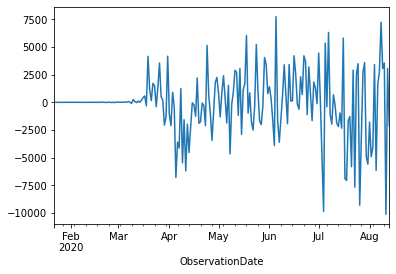

In [154]:
result.resid.plot()

<AxesSubplot:ylabel='Density'>

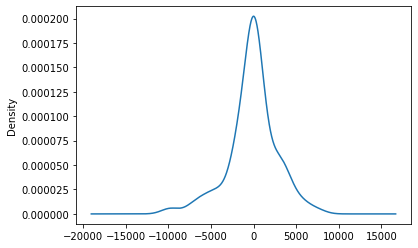

In [155]:
result.resid.plot(kind='kde')

In [162]:
pred = result.predict(start='2020-08-14',end='2020-09-13'
                    , )

<AxesSubplot:xlabel='ObservationDate'>

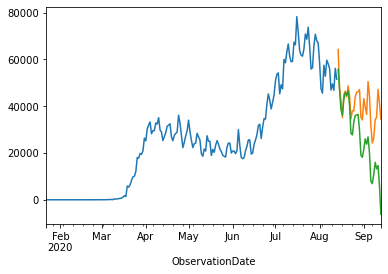

In [163]:
train['Confirmed'].plot(label='Train')
test['Confirmed'].plot(label='Test')
pred.plot(label='pred')

## Rolling forecast
- 일정 구간을 train, 다음 것을 예측을 반복

In [165]:
from statsmodels.tsa.arima_model import ARIMA
import itertools

In [175]:
p = list(range(0,6))
d= [1,2]
q = list(range(0,2))
pdq = list(itertools.product(p,d,q))

In [178]:
for params in pdq:
    model = ARIMA(timeseries, order=params)
    result = model.fit(disp=-1)
    print('ARIMA{}  AIC : {}'.format(params,result.aic))

ARIMA(0, 1, 0)  AIC : 3935.7017097744483
ARIMA(0, 1, 1)  AIC : 3937.582587394849
ARIMA(0, 2, 0)  AIC : 4061.9453403812095
ARIMA(0, 2, 1)  AIC : 3924.744203746418
ARIMA(1, 1, 0)  AIC : 3937.590721228459
ARIMA(1, 1, 1)  AIC : 3932.7773011616746
ARIMA(1, 2, 0)  AIC : 4006.4579126282515


ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [189]:
predictions = []
history = [x for x in timeseries]
for t in range(len(test)):
    model = ARIMA(history, order=(4,1,3))
    result = model.fit(disp=0)
    output = result.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test['Confirmed'][t]
    history.append(obs)

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [190]:
mean_squared_error(test['Confirmed'],predictions)

34861273.49686377

In [183]:
timeseries.describe()

count      205.000000
mean     25604.673171
std      21720.648631
min          0.000000
25%        516.000000
50%      24252.000000
75%      35098.000000
max      78310.000000
Name: Confirmed, dtype: float64

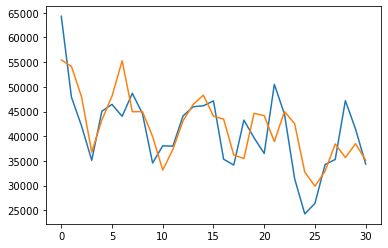

In [191]:
plt.plot(np.asarray(test['Confirmed']))
plt.plot(predictions)
